# Project. Life Expectancy

For this project, the life expectancy dataset obtained from the website: https://www.kaggle.com/kumarajarshi/life-expectancy-who/version/1 was used. The data related to life expectancy and health factors were collected from the WHO website, and the corresponding economic data was collected from the United Nation website for the years 2000 to 2015.  

This dataset was also used for a group project observing the linear relationship between of the life expectancy variable and other predictor variables in another class. However, during the statistical analysis process, we noticted that half of the dataset were missing information, which could lead to a miscalculation. To obtain a more accurate result for the analysis, I chose to perform missing-data imputations to clean the dataset so it could be analyzed as if there were no missing.  


In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
import math
from itertools import groupby

## Goal of the project

The main goal of this project is to handle missing data using a variety of methods learned in the class which are applications of the programming language Python, linear regression model, and advanced regression models in sklearn.

## Data description

There were 20 variables in the dataset which was collected for 193 countries during 16 years from 2000 to 2015. In total, we had 2938 observations.

Below are the list and description of all variables:

    - Life expectancy          Life expectancy (age) for a country in a particular year
    - Year
    - Status			       The status of country (Developed or Developing) 
	- Adult Mortality	      Probability of dying between 15 and 60 years per 1000 population
    - Infant deaths		    Number of Infant Deaths per 1000 population
    - Alcohol		          Alcohol, recorded per capita (15+) consumption (in litres)
    - Percentage Expenditure   Expenditure on health as a percentage of Gross Domestic Product per capita(%)
    - Hepatitis B		      Hepatitis B immunization coverage among 1-year-olds (%)
    - Measles		          Measles - number of reported cases per 1000 population
    - BMI			          Average Body Mass Index of entire population
    - Under-five deaths	    Number of under-five deaths per 1000 population
    - Polio			        Polio immunization coverage among 1-year-olds (%)
    - Total expenditure        Government expenditure on health as a percentage of total government expenditure (%)
    - Diphtheria               Diphtheria tetanus toxoid and pertussis immunization coverage among 1-year-olds
    - HIV/AIDS		         Deaths per 1000 live births HIV/AIDS (0-4 years)
    - GDP			          Gross Domestic Product per capita (in USD)
    - Population		       Population of the country
    - Thinness 10-19 years     Prevalence of thinness among children and adolescents for Age 10-19 
    - Thinness 5-9 year        Prevalence of thinness among children for Age 5-9
    - Income composition       Human Development Index in terms of income of resources composition (from 0 to 1)
    - Schooling	 	       Number of years of Schooling


In [346]:
# Reading in data
Location = 'Life_Expectancy.csv'
df = pd.read_csv(Location)
df.head()

,Country,Year,Status,LE,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,hiv_aids,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Based on the counts in the below summary statistics table, we noticed that the following variables had missing data. 
- Life expectancy: 10 
- Adult mortality: 10
- Alcohol: 194
- Hepatitis B: 553
- BMI: 34
- Polio: 19
- Total expenditure: 226
- Diphtheria: 19
- GDP: 448
- Population: 652
- Thinness 10-19 years: 34
- Thinness 5-9 years: 34
- Income composition of resources: 167
- Schooling: 163

In [347]:
# Summary statistics
df.describe()

,Year,LE,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,bmi,under-five_deaths,Polio,Total_expenditure,Diphtheria,hiv_aids,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


We observed that the histogram plot of response variable life expectancy showed an approximately normal distribution.

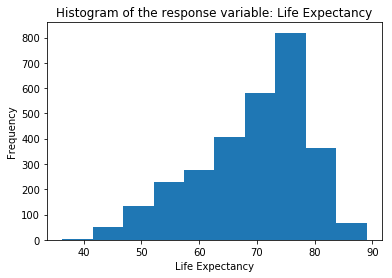

In [348]:
# Plot histogram of the response variable life expectancy
plt.figure()
df['LE'].plot.hist()
plt.xlabel('Life Expectancy')
plt.title('Histogram of the response variable: Life Expectancy')
plt.show()

Some of the scatter plots of the response variable life expectancy versus predictors showed a linear relationship which was a good signal to contrust a linear regression model to predict life expectancy.

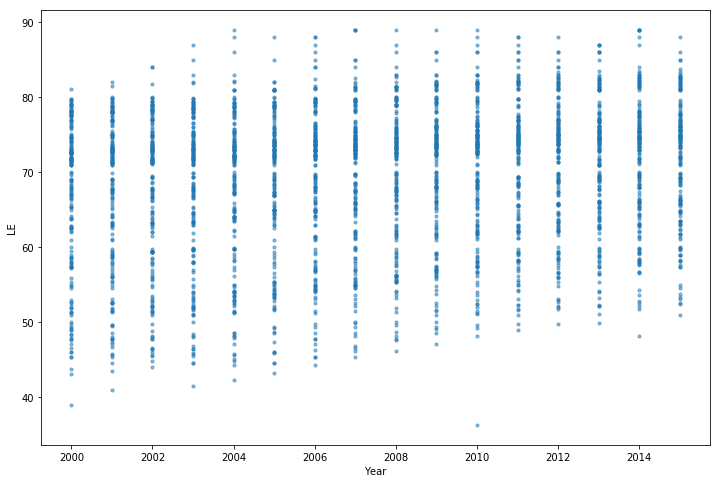

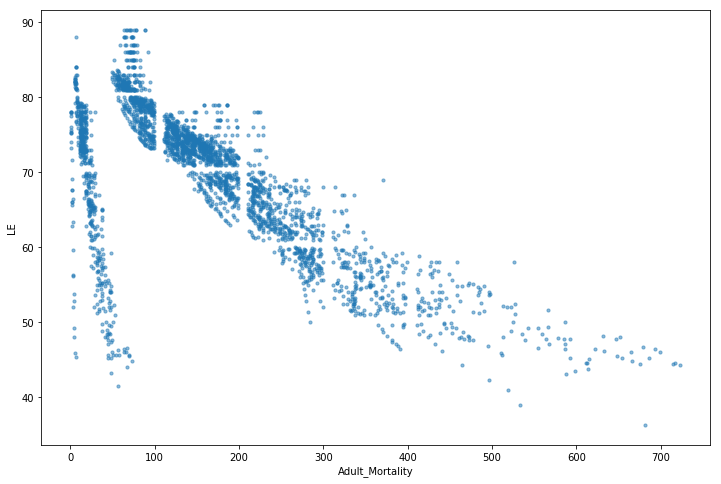

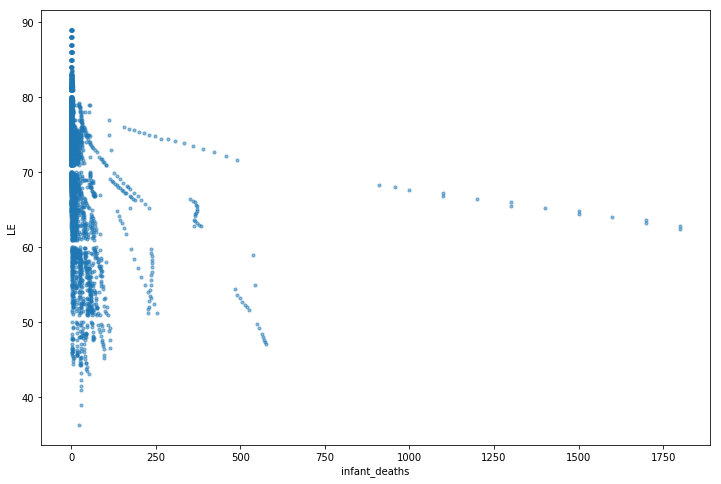

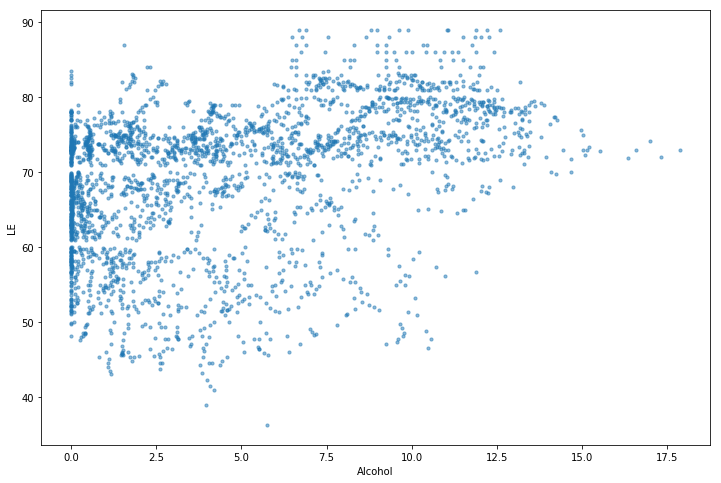

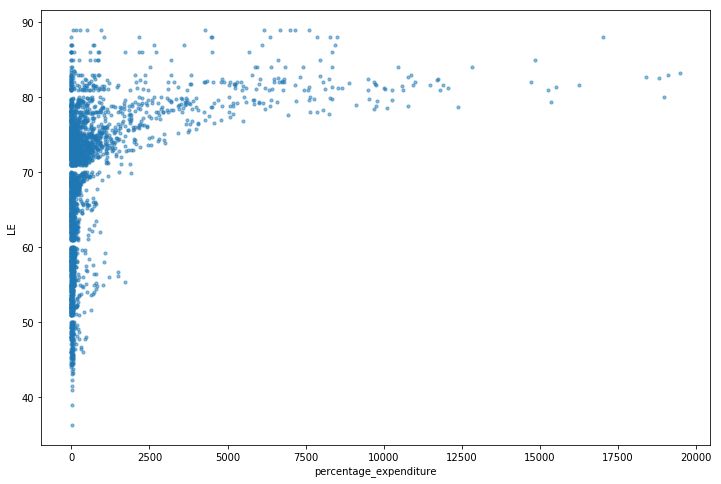

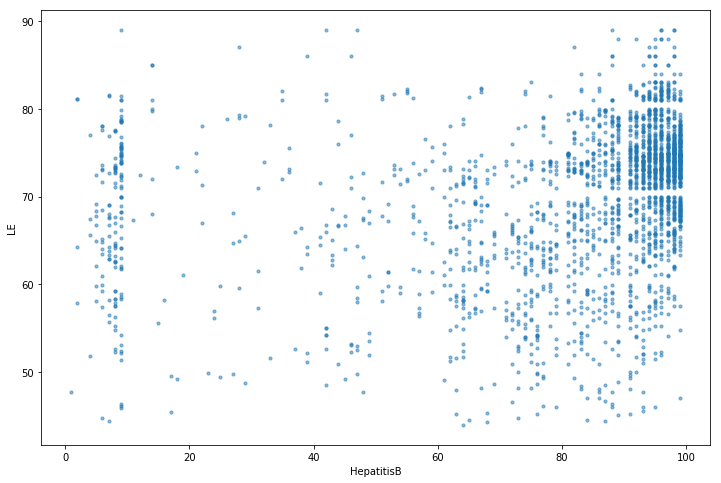

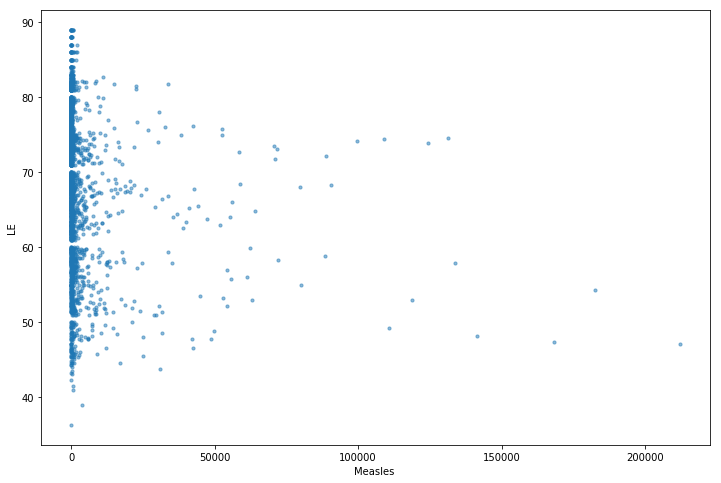

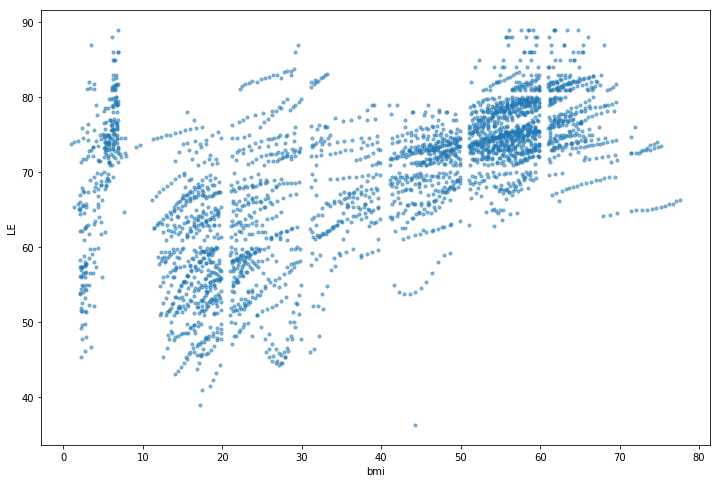

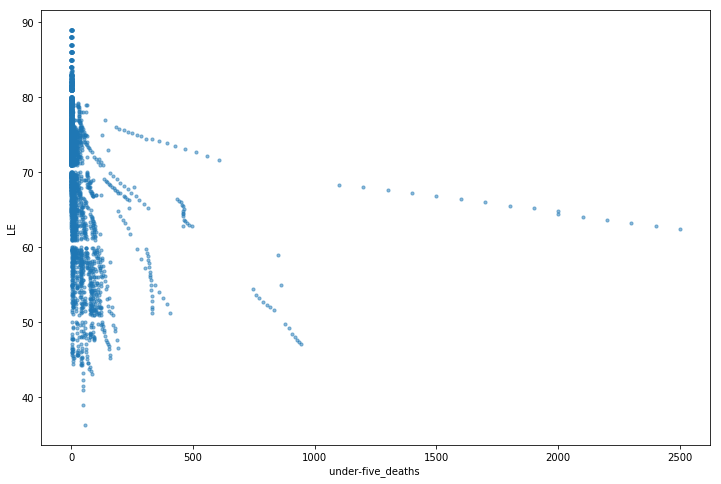

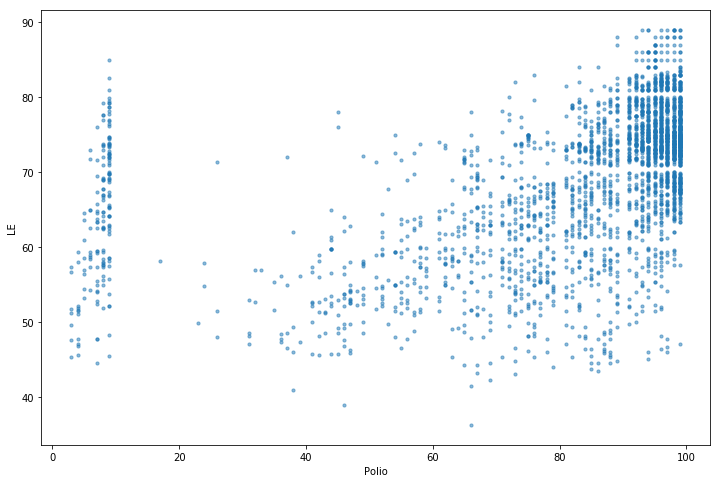

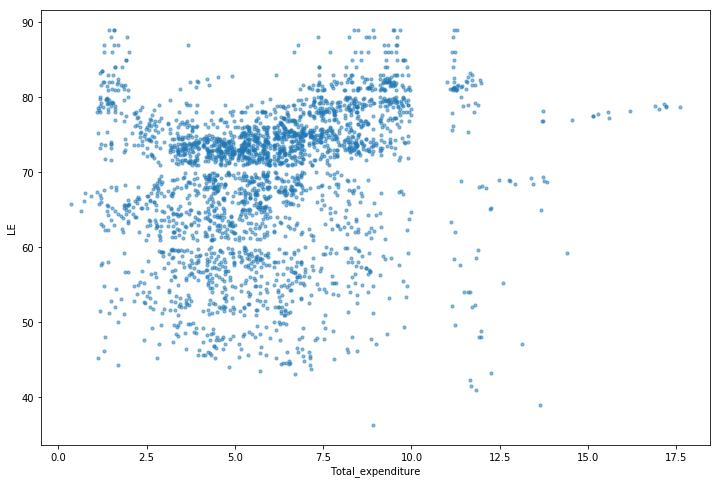

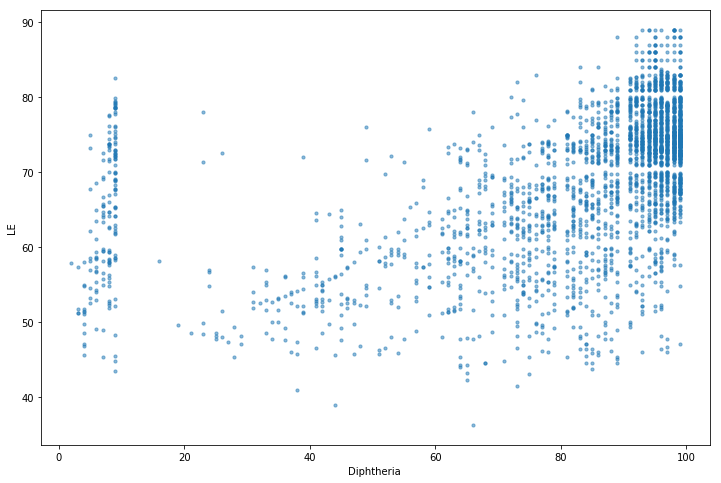

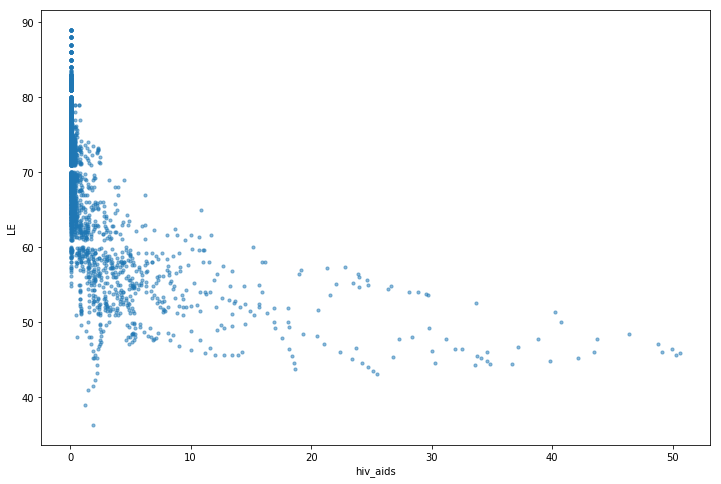

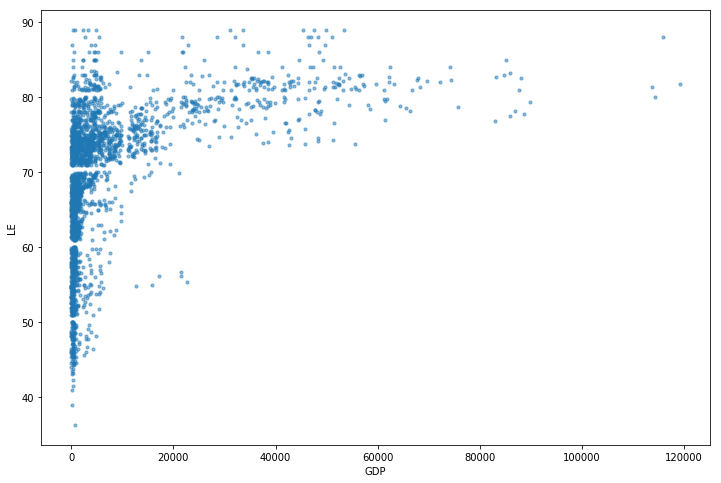

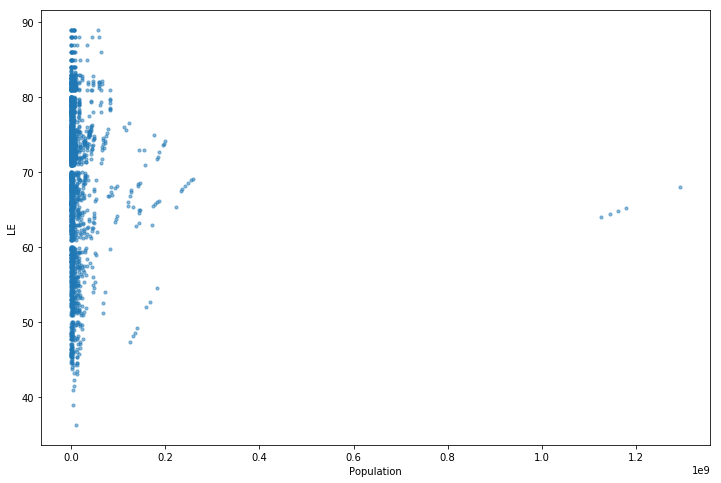

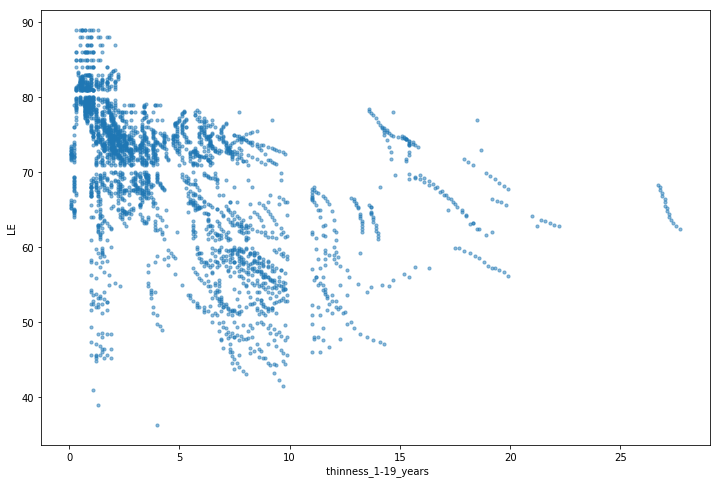

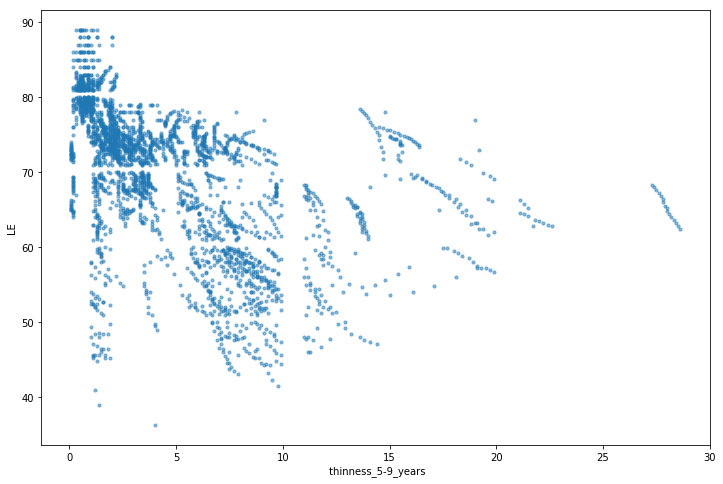

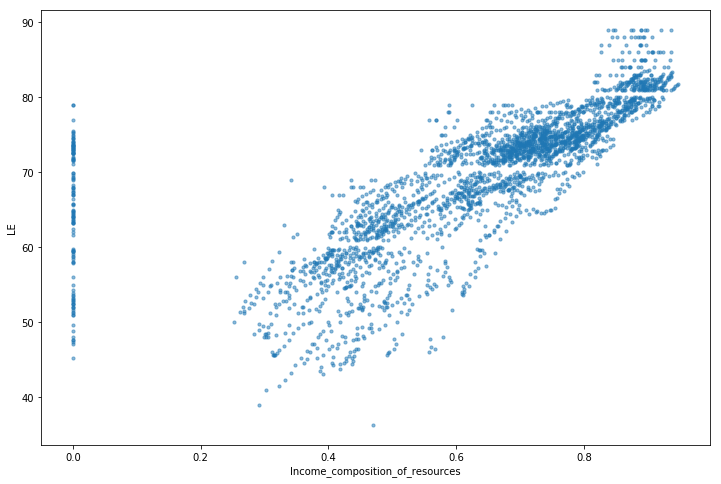

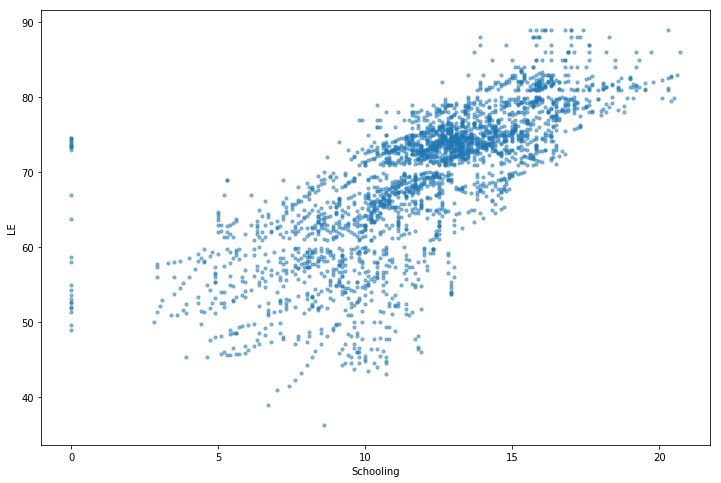

In [349]:
cols = [i for i in list(df.columns) if i not in ['Status','LE', 'Country']]
    
for col in cols:
    fig, ax = plt.subplots(figsize=(12,8))
    df.plot(kind='scatter', x=col, y='LE', ax=ax, s=10, alpha=0.5)
    plt.show()
    

## Imputation for predictors

In a relevant project using the same dataset, we used the best subset techniques and a variety of tools to check the model validity to contruct various multiple linear regression models. Among those models, we decided the best model to predict life expectancy involving the following predictor variables: year, adult mortality, alcohol, percentage expenditure, BMI, HIV/AIDS, income composition of resources, schooling.

In this project, we chose these eight predictor variables in any linear regression used for missing data imputation methods. 

However, five of those predictor variables had missing values as well.
- Adult mortality: 10 missing records
- Alcohol: 194 missing records
- BMI: 34 missing records
- Income composition of resources: 167 missing records
- Schooling: 163 missing records

Before handling the missing-data in response variable, we decided to replace missing values in predictors.

<p><strong>Adult Mortality</strong></p>

The variable adult mortality had 10 missing records which all came from less known countries in 2013. As noticed that there were no related information of those countries in the other years, the simple imputation methods such as mean imputation or last value carried forward could not be applied. 

We observed that those countries had no information or just a few for population as well, therefore it was hard to find a similar country to do hot-deck imputation by learning the adult mortality ratio of population of a similar population density country. At last, we found that all those missing countries had zero value for infant deaths which gave some sense of replacing the missing values in adult mortality with zero.


In [350]:
# Print missing-value records in Adult Mortality
missing1 = df['Adult_Mortality'].isnull()
print("\n\nBelow are 10 missing records:")
df.loc[missing1,:]



Below are 10 missing records:


,Country,Year,Status,LE,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,hiv_aids,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [351]:
# Copy all values in Adult_Mortality to a new column Adult_Mortality_n
df['Adult_Mortality_n'] = df['Adult_Mortality']

# Replace missing values in Adult_Mortality_n with zero value
df.loc[missing1,'Adult_Mortality_n'] = 0
df.loc[missing1,:]

,Country,Year,Status,LE,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Total_expenditure,Diphtheria,hiv_aids,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Adult_Mortality_n
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN,0.0
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7,0.0
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6,0.0
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN,0.0
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2,0.0
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4,0.0
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1,0.0
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0,0.0


<p><strong>Alcohol</strong></p>

There were 194 missing records in the variable alcohol. 176 of those were the alcohol consumption per capita for 176 countries for the year 2015; 16 were the information for the country South Sudan from 2000 to 2015; 1 missing-value record were of the country Montenegro in 2005; 1 were for Palau in 2013.

As most of missing records had the history data for previous years expect Montenegro, South Sudan and Palau; we decided to replace the missing alcohol assumption with the mean alcohol assumption of year 2000-2014 using the mean imputation method.

In [352]:
# Print missing-value records in Alcohol
missing2 = df['Alcohol'].isnull()
print("\n\nBelow are 194 missing records:")
df.loc[missing2,:]



Below are 194 missing records:


,Country,Year,Status,LE,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Total_expenditure,Diphtheria,hiv_aids,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Adult_Mortality_n
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,19.0
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,335.0
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,13.0
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,116.0
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,...,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7,118.0
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.0,93.0,74,...,NaN,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4,59.0
128,Austria,2015,Developed,81.5,65.0,0,NaN,0.0,93.0,309,...,NaN,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9,65.0
144,Azerbaijan,2015,Developing,72.7,118.0,5,NaN,0.0,96.0,0,...,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7,118.0
160,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.0,95.0,0,...,NaN,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6,147.0
176,Bahrain,2015,Developing,76.9,69.0,0,NaN,0.0,98.0,0,...,NaN,98.0,0.1,22688.878240,NaN,6.2,6.1,0.823,14.5,69.0


In [353]:
# Copy all values in Alcohol to a new column Alcohol_n
df['Alcohol_n'] = df['Alcohol']

# Replace the missing-value records in Alcohol in 2015 with the grouped mean values of 2000-2014
df.loc[missing2, 'Alcohol_n'] = df.groupby('Country')['Alcohol'].transform('mean')

For South Sudan and Palau whose alcohol variables had no values for all the years, I chose the zero value to replace for those missing records.

In [354]:
# Replace the missing-value records in Alcohol with 0 for South Sudan and Palau
df.loc[(df['Country']=='South Sudan'),['Alcohol_n']] = 0
df.loc[(df['Country']=='Palau'),['Alcohol_n']] = 0

# Print all missing alcohol with imputed data in column Alcohol_n
df.loc[missing2,:]

,Country,Year,Status,LE,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Diphtheria,hiv_aids,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Adult_Mortality_n,Alcohol_n
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,19.0,0.406667
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,335.0,5.740667
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,13.0,7.949333
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,116.0,7.966667
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,...,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7,118.0,3.702667
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.0,93.0,74,...,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4,59.0,10.155333
128,Austria,2015,Developed,81.5,65.0,0,NaN,0.0,93.0,309,...,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9,65.0,12.236000
144,Azerbaijan,2015,Developing,72.7,118.0,5,NaN,0.0,96.0,0,...,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7,118.0,0.992000
160,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.0,95.0,0,...,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6,147.0,10.271333
176,Bahrain,2015,Developing,76.9,69.0,0,NaN,0.0,98.0,0,...,98.0,0.1,22688.878240,NaN,6.2,6.1,0.823,14.5,69.0,1.934667


<p><strong>BMI</strong></p>

The variable BMI had 34 missing-data records. 32 of those were missing values of Sudan and South Sudan in 16 years from 2000 to 2015; 1 were of the record for San Marino in 2013; and, 1 were for Monaco in 2013.

As there were no history data for those missing-value countries, we decided to replace those missing records with the mean of BMI of developing countries.

In [355]:
# Print missing-value records in BMI
missing3 = df['bmi'].isnull()
print("\n\nBelow are 34 missing records:")
df.loc[missing3,:]



Below are 34 missing records:


,Country,Year,Status,LE,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Diphtheria,hiv_aids,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Adult_Mortality_n,Alcohol_n
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.010
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1,0.0,0.010
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9,332.0,0.000
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,...,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9,343.0,0.000
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9,345.0,0.000
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,...,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9,347.0,0.000
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,...,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9,355.0,0.000
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0,359.0,0.000
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0,369.0,0.000
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0,377.0,0.000


In [356]:
# Copy all values in bmi to a new column bmi_n
df['bmi_n'] = df['bmi']

# Replace the missing-value records with the mean BMI of developing countries
df.loc[missing3, 'bmi_n'] = df.groupby('Status')['bmi'].transform('mean')
df.loc[missing3,:]

,Country,Year,Status,LE,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,hiv_aids,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Adult_Mortality_n,Alcohol_n,bmi_n
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,0.1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.010,35.435326
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,0.1,NaN,NaN,NaN,NaN,NaN,15.1,0.0,0.010,35.435326
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9,332.0,0.000,35.435326
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,...,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9,343.0,0.000,35.435326
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9,345.0,0.000,35.435326
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,...,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9,347.0,0.000,35.435326
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,...,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9,355.0,0.000,35.435326
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0,359.0,0.000,35.435326
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0,369.0,0.000,35.435326
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0,377.0,0.000,35.435326


<p><strong>Income composition of resources</strong></p>

There were 167 missing-value rows in the column Income_composition_of_resources. As the variable income composition of resources represented for the average income range of a country's population, the value of a developed country would be close to the other developed coutries, and this held true for developing countries as well.

We chose to replace those missing records with the mean of Income_composition_of_resources grouped by the country status.

In [357]:
# Print missing-value records 
missing4 = df['Income_composition_of_resources'].isnull()
print("\n\nBelow are 167 missing records:")
df.loc[missing4,:]



Below are 167 missing records:


,Country,Year,Status,LE,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,hiv_aids,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Adult_Mortality_n,Alcohol_n,bmi_n
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,...,1.9,NaN,NaN,5.5,5.5,NaN,NaN,397.0,2.837333,28.0
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,...,2.0,NaN,NaN,5.6,5.6,NaN,NaN,47.0,0.010000,27.4
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,...,2.4,NaN,NaN,5.8,5.7,NaN,NaN,412.0,3.150000,26.8
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,...,2.9,NaN,NaN,5.9,5.9,NaN,NaN,415.0,3.240000,26.2
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,...,3.3,NaN,NaN,6.1,6.0,NaN,NaN,419.0,3.130000,25.6
437,Côte d'Ivoire,2010,Developing,51.5,417.0,60,3.15,0.0,85.0,441,...,3.3,NaN,NaN,6.3,6.2,NaN,NaN,417.0,3.150000,25.0
438,Côte d'Ivoire,2009,Developing,51.0,426.0,60,2.92,0.0,81.0,183,...,3.7,NaN,NaN,6.5,6.4,NaN,NaN,426.0,2.920000,24.4
439,Côte d'Ivoire,2008,Developing,54.0,437.0,60,2.69,0.0,74.0,12,...,4.1,NaN,NaN,6.6,6.6,NaN,NaN,437.0,2.690000,23.8
440,Côte d'Ivoire,2007,Developing,49.9,443.0,61,2.58,0.0,76.0,5,...,5.3,NaN,NaN,6.8,6.7,NaN,NaN,443.0,2.580000,23.2
441,Côte d'Ivoire,2006,Developing,49.4,452.0,62,2.65,0.0,77.0,11,...,5.8,NaN,NaN,7.0,6.9,NaN,NaN,452.0,2.650000,22.6


In [358]:
# Copy all values in Income composition of resources to a new column income_n
df['income_n'] = df['Income_composition_of_resources']

# Replace the missing-value records with the mean grouped by Status
df.loc[missing4, 'income_n'] = df.groupby('Status')['Income_composition_of_resources'].transform('mean')
df.loc[missing4,:]

,Country,Year,Status,LE,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Adult_Mortality_n,Alcohol_n,bmi_n,income_n
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,...,NaN,NaN,5.5,5.5,NaN,NaN,397.0,2.837333,28.0,0.582310
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,...,NaN,NaN,5.6,5.6,NaN,NaN,47.0,0.010000,27.4,0.582310
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,...,NaN,NaN,5.8,5.7,NaN,NaN,412.0,3.150000,26.8,0.582310
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,...,NaN,NaN,5.9,5.9,NaN,NaN,415.0,3.240000,26.2,0.582310
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,...,NaN,NaN,6.1,6.0,NaN,NaN,419.0,3.130000,25.6,0.582310
437,Côte d'Ivoire,2010,Developing,51.5,417.0,60,3.15,0.0,85.0,441,...,NaN,NaN,6.3,6.2,NaN,NaN,417.0,3.150000,25.0,0.582310
438,Côte d'Ivoire,2009,Developing,51.0,426.0,60,2.92,0.0,81.0,183,...,NaN,NaN,6.5,6.4,NaN,NaN,426.0,2.920000,24.4,0.582310
439,Côte d'Ivoire,2008,Developing,54.0,437.0,60,2.69,0.0,74.0,12,...,NaN,NaN,6.6,6.6,NaN,NaN,437.0,2.690000,23.8,0.582310
440,Côte d'Ivoire,2007,Developing,49.9,443.0,61,2.58,0.0,76.0,5,...,NaN,NaN,6.8,6.7,NaN,NaN,443.0,2.580000,23.2,0.582310
441,Côte d'Ivoire,2006,Developing,49.4,452.0,62,2.65,0.0,77.0,11,...,NaN,NaN,7.0,6.9,NaN,NaN,452.0,2.650000,22.6,0.582310


<p><strong>Schooling</strong></p>

The variable Schooling had 163 missing-data records. Schooling recorded number of years of schooling. Common sense shows that there are similarity in terms of education between developed countries; therefore we decided to impute the missing data with the mean grouped by country statuses.

In [359]:
# Print missing-value records 
missing5 = df['Schooling'].isnull()
print("\n\nBelow are 163 missing records:")
df.loc[missing5,:]



Below are 163 missing records:


,Country,Year,Status,LE,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Adult_Mortality_n,Alcohol_n,bmi_n,income_n
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,...,NaN,NaN,5.5,5.5,NaN,NaN,397.0,2.837333,28.0,0.582310
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,...,NaN,NaN,5.6,5.6,NaN,NaN,47.0,0.010000,27.4,0.582310
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,...,NaN,NaN,5.8,5.7,NaN,NaN,412.0,3.150000,26.8,0.582310
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,...,NaN,NaN,5.9,5.9,NaN,NaN,415.0,3.240000,26.2,0.582310
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,...,NaN,NaN,6.1,6.0,NaN,NaN,419.0,3.130000,25.6,0.582310
437,Côte d'Ivoire,2010,Developing,51.5,417.0,60,3.15,0.0,85.0,441,...,NaN,NaN,6.3,6.2,NaN,NaN,417.0,3.150000,25.0,0.582310
438,Côte d'Ivoire,2009,Developing,51.0,426.0,60,2.92,0.0,81.0,183,...,NaN,NaN,6.5,6.4,NaN,NaN,426.0,2.920000,24.4,0.582310
439,Côte d'Ivoire,2008,Developing,54.0,437.0,60,2.69,0.0,74.0,12,...,NaN,NaN,6.6,6.6,NaN,NaN,437.0,2.690000,23.8,0.582310
440,Côte d'Ivoire,2007,Developing,49.9,443.0,61,2.58,0.0,76.0,5,...,NaN,NaN,6.8,6.7,NaN,NaN,443.0,2.580000,23.2,0.582310
441,Côte d'Ivoire,2006,Developing,49.4,452.0,62,2.65,0.0,77.0,11,...,NaN,NaN,7.0,6.9,NaN,NaN,452.0,2.650000,22.6,0.582310


In [360]:
# Copy all values in Schooling to a new column schooling_n
df['schooling_n'] = df['Schooling']

# Replace the missing-value records with the mean grouped by Status
df.loc[missing5, 'schooling_n'] = df.groupby('Status')['Schooling'].transform('mean')
df.loc[missing5,:]

,Country,Year,Status,LE,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Adult_Mortality_n,Alcohol_n,bmi_n,income_n,schooling_n
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,...,NaN,5.5,5.5,NaN,NaN,397.0,2.837333,28.0,0.582310,11.219256
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,...,NaN,5.6,5.6,NaN,NaN,47.0,0.010000,27.4,0.582310,11.219256
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,...,NaN,5.8,5.7,NaN,NaN,412.0,3.150000,26.8,0.582310,11.219256
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,...,NaN,5.9,5.9,NaN,NaN,415.0,3.240000,26.2,0.582310,11.219256
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,...,NaN,6.1,6.0,NaN,NaN,419.0,3.130000,25.6,0.582310,11.219256
437,Côte d'Ivoire,2010,Developing,51.5,417.0,60,3.15,0.0,85.0,441,...,NaN,6.3,6.2,NaN,NaN,417.0,3.150000,25.0,0.582310,11.219256
438,Côte d'Ivoire,2009,Developing,51.0,426.0,60,2.92,0.0,81.0,183,...,NaN,6.5,6.4,NaN,NaN,426.0,2.920000,24.4,0.582310,11.219256
439,Côte d'Ivoire,2008,Developing,54.0,437.0,60,2.69,0.0,74.0,12,...,NaN,6.6,6.6,NaN,NaN,437.0,2.690000,23.8,0.582310,11.219256
440,Côte d'Ivoire,2007,Developing,49.9,443.0,61,2.58,0.0,76.0,5,...,NaN,6.8,6.7,NaN,NaN,443.0,2.580000,23.2,0.582310,11.219256
441,Côte d'Ivoire,2006,Developing,49.4,452.0,62,2.65,0.0,77.0,11,...,NaN,7.0,6.9,NaN,NaN,452.0,2.650000,22.6,0.582310,11.219256


After imputation for predictor variables, we created 5 new columns which contained the original and imputed data. 
- Adult_Mortality_n
- Alcohol_n
- bmi_n
- income_n
- schooling_n

All those columns had no NaN values and would be used for imputing missing values in the response variable - life expectancy.

In [361]:
df.describe()

,Year,LE,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,bmi,under-five_deaths,...,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Adult_Mortality_n,Alcohol_n,bmi_n,income_n,schooling_n
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,...,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,1.275338e+07,4.839704,4.870317,0.627551,11.992793,164.235534,4.574228,38.287849,0.629394,12.025459
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,...,6.101210e+07,4.420195,4.508882,0.210904,3.358920,124.451093,4.042375,19.930067,0.207021,3.304714
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,...,1.957932e+05,1.600000,1.500000,0.493000,10.100000,73.000000,0.852500,19.400000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,...,1.386542e+06,3.300000,3.300000,0.677000,12.300000,144.000000,3.685000,43.000000,0.672000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,...,7.420359e+06,7.200000,7.200000,0.779000,14.300000,227.000000,7.677500,56.100000,0.780000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,1.293859e+09,27.700000,28.600000,0.948000,20.700000,723.000000,17.870000,87.300000,0.948000,20.700000


## Imputation for the response variable: life expectancy

We used three different methods including a linear regression model, a neural network regression model, and a kNN regression model to impute the missing data in the response variable - life expectancy (LE).

<p><strong>Linear Regression Model</strong></p>
The first step, we created a new data frame only including the variables which had significant effects on the response variable, life expectancy.

In [393]:
df_new = df.loc[:,['Country','Year','LE','Adult_Mortality_n','Alcohol_n','percentage_expenditure','hiv_aids','bmi_n','income_n','schooling_n']]
df_new

,Country,Year,LE,Adult_Mortality_n,Alcohol_n,percentage_expenditure,hiv_aids,bmi_n,income_n,schooling_n
0,Afghanistan,2015,65.0,263.0,0.010,71.279624,0.1,19.1,0.479,10.1
1,Afghanistan,2014,59.9,271.0,0.010,73.523582,0.1,18.6,0.476,10.0
2,Afghanistan,2013,59.9,268.0,0.010,73.219243,0.1,18.1,0.470,9.9
3,Afghanistan,2012,59.5,272.0,0.010,78.184215,0.1,17.6,0.463,9.8
4,Afghanistan,2011,59.2,275.0,0.010,7.097109,0.1,17.2,0.454,9.5
5,Afghanistan,2010,58.8,279.0,0.010,79.679367,0.1,16.7,0.448,9.2
6,Afghanistan,2009,58.6,281.0,0.010,56.762217,0.1,16.2,0.434,8.9
7,Afghanistan,2008,58.1,287.0,0.030,25.873925,0.1,15.7,0.433,8.7
8,Afghanistan,2007,57.5,295.0,0.020,10.910156,0.1,15.2,0.415,8.4
9,Afghanistan,2006,57.3,295.0,0.030,17.171518,0.1,14.7,0.405,8.1


In [394]:
# Summary of the new data frame 
df_new.describe()

,Year,LE,Adult_Mortality_n,Alcohol_n,percentage_expenditure,hiv_aids,bmi_n,income_n,schooling_n
count,2938.000000,2928.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.235534,4.574228,738.251295,1.742103,38.287849,0.629394,12.025459
std,4.613841,9.523867,124.451093,4.042375,1987.914858,5.077785,19.930067,0.207021,3.304714
min,2000.000000,36.300000,0.000000,0.000000,0.000000,0.100000,1.000000,0.000000,0.000000
25%,2004.000000,63.100000,73.000000,0.852500,4.685343,0.100000,19.400000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.685000,64.912906,0.100000,43.000000,0.672000,12.300000
75%,2012.000000,75.700000,227.000000,7.677500,441.534144,0.800000,56.100000,0.780000,14.300000
max,2015.000000,89.000000,723.000000,17.870000,19479.911610,50.600000,87.300000,0.948000,20.700000


We removed any rows with missing data (NaN), in order to fit the linear regression model.

In [395]:
df_complete = df_new.dropna(axis=0, how='any')

Then we divided that into features (X) and outcomes (y).

In [396]:
X = df_complete.drop(['Country', 'LE'], axis = 1)
print("Here are the features (X):")
print(X.head())

print("\n\nHere is the outcome variable (y):")
y = df_complete['LE']
print(y)

Here are the features (X):
   Year  Adult_Mortality_n  Alcohol_n  percentage_expenditure  hiv_aids  \
0  2015              263.0       0.01               71.279624       0.1   
1  2014              271.0       0.01               73.523582       0.1   
2  2013              268.0       0.01               73.219243       0.1   
3  2012              272.0       0.01               78.184215       0.1   
4  2011              275.0       0.01                7.097109       0.1   

   bmi_n  income_n  schooling_n  
0   19.1     0.479         10.1  
1   18.6     0.476         10.0  
2   18.1     0.470          9.9  
3   17.6     0.463          9.8  
4   17.2     0.454          9.5  


Here is the outcome variable (y):
0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.8
17      77.5
18      77.2
19      76.9
20      76.6
21      7

We fited a linear regression model with the response variable y and the predictor variables X.

In [397]:
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [400]:
print ("Here are coefficients of the model:")
print(lm.coef_)
print ("\n\nHere is the intercept of the model:")
print(lm.intercept_)

Here are coefficients of the model:
[-1.05675568e-02 -2.07583860e-02  6.84464674e-02  3.41383113e-04
 -4.97830273e-01  5.53483375e-02  7.99574130e+00  8.90619017e-01]


Here is the intercept of the model:
76.2999575164769


Then we got predictions on the full dataset.

In [367]:
X_all = df_new.drop(['Country', 'LE'], axis = 1)
preds = lm.predict(X_all)

We copied all predictions to a new column LE1 to compare with the results of other methods.

In [369]:
missing = df['LE'].isnull()
# Copy all predicted values to a new column LE1
df_new['LE1'] = preds
df_new.loc[missing,:]

,Country,Year,LE,Adult_Mortality_n,Alcohol_n,percentage_expenditure,hiv_aids,bmi_n,income_n,schooling_n,LE1
624,Cook Islands,2013,NaN,0.0,0.01,0.000000,0.1,82.800000,0.58231,11.219256,74.209291
769,Dominica,2013,NaN,0.0,0.01,11.419555,0.1,58.400000,0.72100,12.700000,75.290399
1650,Marshall Islands,2013,NaN,0.0,0.01,871.878317,0.1,81.600000,0.58231,0.000000,64.448435
1715,Monaco,2013,NaN,0.0,0.01,0.000000,0.1,35.435326,0.58231,11.219256,71.587735
1812,Nauru,2013,NaN,0.0,0.01,15.606596,0.1,87.300000,0.58231,9.600000,73.021547
1909,Niue,2013,NaN,0.0,0.01,0.000000,0.1,77.300000,0.58231,11.219256,73.904876
1958,Palau,2013,NaN,0.0,0.00,344.690631,0.1,83.300000,0.77900,14.200000,78.581343
2167,Saint Kitts and Nevis,2013,NaN,0.0,8.54,0.000000,0.1,5.200000,0.74900,13.400000,73.773132
2216,San Marino,2013,NaN,0.0,0.01,0.000000,0.1,35.435326,0.58231,15.100000,75.044000
2713,Tuvalu,2013,NaN,0.0,0.01,78.281203,0.1,79.300000,0.58231,0.000000,64.050214


<p><strong>Neural Network Regression Model</strong></p>
As neural networks performs better when all the features are on roughly the same scale, we first scaled the variables X. 

In [370]:
X = pd.DataFrame(preprocessing.scale(X), columns = X.columns)
print("Here are the predictors (X):")
print(X.head())

print("\n\nHere is the outcome variable (y):")
print(y)

Here are the predictors (X):
       Year  Adult_Mortality_n  Alcohol_n  percentage_expenditure  hiv_aids  \
0  1.626978           0.790238  -1.132904               -0.336102 -0.324055   
1  1.410048           0.854614  -1.132904               -0.334975 -0.324055   
2  1.193118           0.830473  -1.132904               -0.335128 -0.324055   
3  0.976187           0.862660  -1.132904               -0.332633 -0.324055   
4  0.759257           0.886801  -1.132904               -0.368345 -0.324055   

      bmi_n  income_n  schooling_n  
0 -0.962510 -0.725476    -0.586852  
1 -0.987700 -0.739948    -0.617215  
2 -1.012890 -0.768893    -0.647577  
3 -1.038081 -0.802663    -0.677939  
4 -1.058233 -0.846080    -0.769026  


Here is the outcome variable (y):
0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.8
17      77.5
18  

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


Then we created an instance of the MLPRegressor class in sklearn which specified three hidden layers with sizes of 100, 100, and 50, respectively. After that, we fitted a neural network regression model (lm1).

In [386]:
lm1 = MLPRegressor(hidden_layer_sizes=(100,100,50), solver='lbfgs', max_iter=500, random_state=1)
lm1.fit(X,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Then we got predictions on the full dataset and copied all predictions to a new column LE2.

In [387]:
X_all = pd.DataFrame(preprocessing.scale(X_all), columns=X_all.columns)
preds1 = lm1.predict(X_all)

# Copy all predicted values to a new column LE2
df_new['LE2'] = preds1
df_new.loc[missing,:]

,Country,Year,LE,Adult_Mortality_n,Alcohol_n,percentage_expenditure,hiv_aids,bmi_n,income_n,schooling_n,LE1,LE2,LE3
624,Cook Islands,2013,NaN,0.0,0.01,0.000000,0.1,82.800000,0.58231,11.219256,74.209291,66.471321,67.49
769,Dominica,2013,NaN,0.0,0.01,11.419555,0.1,58.400000,0.72100,12.700000,75.290399,73.392857,72.87
1650,Marshall Islands,2013,NaN,0.0,0.01,871.878317,0.1,81.600000,0.58231,0.000000,64.448435,79.227590,67.49
1715,Monaco,2013,NaN,0.0,0.01,0.000000,0.1,35.435326,0.58231,11.219256,71.587735,72.167884,68.12
1812,Nauru,2013,NaN,0.0,0.01,15.606596,0.1,87.300000,0.58231,9.600000,73.021547,68.481096,67.56
1909,Niue,2013,NaN,0.0,0.01,0.000000,0.1,77.300000,0.58231,11.219256,73.904876,66.953626,67.44
1958,Palau,2013,NaN,0.0,0.00,344.690631,0.1,83.300000,0.77900,14.200000,78.581343,73.935023,75.78
2167,Saint Kitts and Nevis,2013,NaN,0.0,8.54,0.000000,0.1,5.200000,0.74900,13.400000,73.773132,74.170777,76.98
2216,San Marino,2013,NaN,0.0,0.01,0.000000,0.1,35.435326,0.58231,15.100000,75.044000,70.635426,70.90
2713,Tuvalu,2013,NaN,0.0,0.01,78.281203,0.1,79.300000,0.58231,0.000000,64.050214,79.099918,66.06


<p><strong>kNN Regression Model</strong></p>
Another method we examined in this project is kNN Regression Model using sklearn. We fitted a kNN regression model using 10 as k value.

In [389]:
lm2 = KNeighborsRegressor(10)
lm2.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

Then we got predictions on the full dataset and copied all predictions to a new column LE3.

In [390]:
preds2 = lm2.predict(X_all)
df_new['LE3'] = preds2
df_new.loc[missing,:]

,Country,Year,LE,Adult_Mortality_n,Alcohol_n,percentage_expenditure,hiv_aids,bmi_n,income_n,schooling_n,LE1,LE2,LE3
624,Cook Islands,2013,NaN,0.0,0.01,0.000000,0.1,82.800000,0.58231,11.219256,74.209291,66.471321,67.49
769,Dominica,2013,NaN,0.0,0.01,11.419555,0.1,58.400000,0.72100,12.700000,75.290399,73.392857,72.87
1650,Marshall Islands,2013,NaN,0.0,0.01,871.878317,0.1,81.600000,0.58231,0.000000,64.448435,79.227590,67.49
1715,Monaco,2013,NaN,0.0,0.01,0.000000,0.1,35.435326,0.58231,11.219256,71.587735,72.167884,68.12
1812,Nauru,2013,NaN,0.0,0.01,15.606596,0.1,87.300000,0.58231,9.600000,73.021547,68.481096,67.56
1909,Niue,2013,NaN,0.0,0.01,0.000000,0.1,77.300000,0.58231,11.219256,73.904876,66.953626,67.44
1958,Palau,2013,NaN,0.0,0.00,344.690631,0.1,83.300000,0.77900,14.200000,78.581343,73.935023,75.78
2167,Saint Kitts and Nevis,2013,NaN,0.0,8.54,0.000000,0.1,5.200000,0.74900,13.400000,73.773132,74.170777,76.98
2216,San Marino,2013,NaN,0.0,0.01,0.000000,0.1,35.435326,0.58231,15.100000,75.044000,70.635426,70.90
2713,Tuvalu,2013,NaN,0.0,0.01,78.281203,0.1,79.300000,0.58231,0.000000,64.050214,79.099918,66.06


## Evaluation



After imputation steps, we created three new columns in the dataset LE1, LE2, LE3 which contains predictions of the full dataset of three following techniques: linear regression model, neural network regression model, kNN regression model.

To evaluate which methods provided the most rational result, we compared the predicted and observed values of all non-missing-data observations.

In [382]:
gs_LE = df_complete['LE']
preds_LE1 = df_new.loc[df_new['LE'].notnull(),'LE1']
preds_LE2 = df_new.loc[df_new['LE'].notnull(),'LE2']
preds_LE3 = df_new.loc[df_new['LE'].notnull(),'LE3']

The scatter plot of predicted versus actual values of the neural network regression model showed the least differences in predictions and recorded data, which inferred that this method performed the most accurate results.

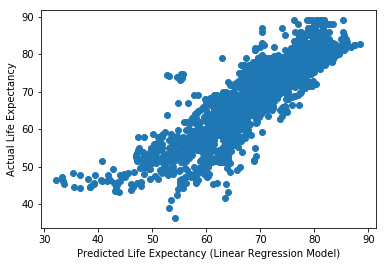

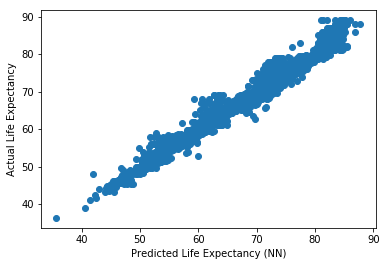

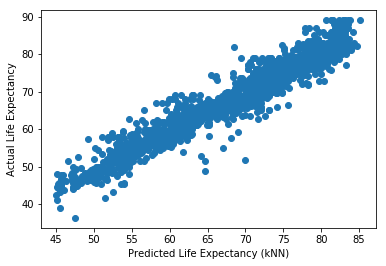

In [383]:
plt.figure()
plt.scatter(preds_LE1, gs_LE)
plt.xlabel("Predicted Life Expectancy (Linear Regression Model)")
plt.ylabel("Actual Life Expectancy")
plt.show()

plt.figure()
plt.scatter(preds_LE2, gs_LE)
plt.xlabel("Predicted Life Expectancy (NN)")
plt.ylabel("Actual Life Expectancy")
plt.show()

plt.figure()
plt.scatter(preds_LE3, gs_LE)
plt.xlabel("Predicted Life Expectancy (kNN)")
plt.ylabel("Actual Life Expectancy")
plt.show()

The mean-squared error (MSE) of MLP regressor was lowest which also showed that neural networks performed better than the other methods.

In [384]:
mse1 = sum((gs_LE - preds_LE1)**2)/len(preds_LE1)
mse2 = sum((gs_LE - preds_LE2)**2)/len(preds_LE2)
mse3 = sum((gs_LE - preds_LE3)**2)/len(preds_LE3)

print("MSE with Linear Regression Model:", mse1)
print("MSE with MLP regressor:", mse2)
print("MSE with kNN regressor:", mse3)

MSE with Linear Regression Model: 19.04402495053477
MSE with MLP regressor: 2.1928715620549233
MSE with kNN regressor: 5.602061577868857


## Conclusion

This project used the mean imputation method for filling missing values of predictor variables which are adult mortality, alcohol, BMI, Income composition of resources, and schooling. After that, the response variable life expectancy was replaced 10 missing values with predictions from three different methods: linear regression, neural network regression, and kNN regression. Comparing the predicted to the actual values of the subset of the data that was not missing showed the most accurate predictions from the neural network method. Therefore, we finally decided to replace 10 missing records of life expectancy with the predictions from neural network model. 

In [401]:
preds_missing = lm1.predict(X_all.loc[missing,:])
print(preds_missing)

[66.47132079 73.39285682 79.22759044 72.16788389 68.48109618 66.95362586
 73.93502337 74.17077723 70.63542556 79.09991754]
